In [32]:
import numpy as np
import rebound
from random import random, uniform, seed
import time

maxorbs = 1.e4
path = '' #'/mnt/raid-cita/dtamayo/newstability/data/'

a1 = 1. # All distances in units of the innermost semimajor axis (always at 1)
Mstar = 1. # All masses in units of stellar mass

logMmin = np.log10(3.e-7) # Mars around Sun
logMmax = np.log10(1.e-3) # Jupiter around Sun
logemin = np.log10(1.e-3)
logemax = np.log10(0.3)
logincmin = np.log10(1.e-3)
logincmax = np.log10(0.1) # max mutual inclination of 11.4 degrees
betamin = 1. # min separation in Hill radii
betamax = 20.

In [41]:
def run(sim_id):
    seed(sim_id)
    
    M1 = 10.**uniform(logMmin, logMmax)
    M2 = 10.**uniform(logMmin, logMmax)
    M3 = 10.**uniform(logMmin, logMmax)
    
    e1 = 10.**uniform(logemin, logemax)
    e2 = 10.**uniform(logemin, logemax)
    e3 = 10.**uniform(logemin, logemax)
    
    i1 = 10.**uniform(logincmin, logincmax)
    i2 = 10.**uniform(logincmin, logincmax)
    i3 = 10.**uniform(logincmin, logincmax)
    
    hill12 = a1*((M1+M2)/3.)**(1./3.)
    beta1 = uniform(betamin, betamax)
    a2 = a1 + beta1*hill12
    
    hill23 = a2*((M2+M3)/3.)**(1./3.)
    beta2 = uniform(betamin, betamax)
    a3 = a2 + beta2*hill23
    
    sim = rebound.Simulation()
    sim.integrator="whfast"
    sim.ri_whfast.safe_mode = 0
    sim.G = 4*np.pi**2
    
    sim.add(m=1.)
    sim.add(m=M1, a=a1, e=e1, pomega=random()*2.*np.pi, inc=i1, Omega=random()*2.*np.pi, f=random()*2.*np.pi, r=hill12)
    sim.add(m=M2, a=a2, e=e2, pomega=random()*2.*np.pi, inc=i2, Omega=random()*2.*np.pi, f=random()*2.*np.pi, r=max(hill12, hill23))
    sim.add(m=M3, a=a3, e=e3, pomega=random()*2.*np.pi, inc=i3, Omega=random()*2.*np.pi, f=random()*2.*np.pi, r=hill23)
    sim.move_to_com()
    ps = sim.particles
    
    sim.dt = 0.09 # 0.09 of inner orbital period
    sim.collision = "direct"
    sim.collision_resolve = collision
 
    features = [(a2-a1)/hill12, (a3-a2)/hill23]
    for p in ps[1:sim.N_real]:
        features += [p.m, p.a, p.P, p.e, p.pomega, p.inc, p.Omega, p.f]
    
    E0 = sim.calculate_energy()
    t0 = time.time()
    
    sim.initSimulationArchive(path+'runs/run'+str(sim_id)+'.bin', interval=maxorbs/100.)
    
    sim.integrate(maxorbs)
    
    if sim.t < maxorbs-1.: # allow for some fudge for t=999999999...
        stable = ['False']
    else:
        stable = ['True']
        
    features = stable+[sim.t]+features+[np.abs((sim.calculate_energy()-E0)/E0), time.time()-t0]
    fname = path+'csvs/run'+str(sim_id)+'.csv'
    with open(fname, 'w') as f:
        f.write(str(sim_id))
        for feature in features:
            f.write(',{0}'.format(feature))
        f.write('\n')
    
    return features

def collision(reb_sim, col):
    reb_sim.contents._status = 5
    return 0

In [42]:
run(2)

['False',
 0.9000000000000002,
 1.6068017336408371,
 1.5812040171120019,
 0.0007000258392406614,
 1.0000000000000002,
 0.9996501707368122,
 0.0016226999513402492,
 0.9951489232939035,
 0.021850470999756604,
 2.7059771561264165,
 2.4726333506220497,
 0.0006549415798473264,
 1.1232815702962724,
 1.189704000407901,
 0.11739025048461231,
 -1.7403664214350054,
 0.004133071469185202,
 -0.03254964595894393,
 -0.31795761993730687,
 4.7461872257687525e-07,
 1.2302548179959951,
 1.3636360706096544,
 0.06654062913412465,
 3.419165228912281,
 0.016288771512220707,
 2.795101302439578,
 1.6854062867180102,
 3.1386611073549645e-05,
 0.0003249645233154297]

In [43]:
Nsystems=2000
res = dv.map_async(longintegration, list(range(Nsystems)))

In [45]:
res.ready()

True

In [46]:
import pandas as pd
import numpy as np
import os

columns = ['Sim_ID', 'Stable', 'Norbits_instability', 'Norbits', 'Mplanet', 'RH/a']
for i in ['1', '2', '3']:
    columns += ['a'+i, 'P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i, 'x'+i, 'y'+i, 'z'+i, 'vx'+i, 'vy'+i, 'vz'+i]
columns += ['Rel_Eerr', 'integ_time']

frames = []
path = '/mnt/raid-cita/dtamayo/Stability/data/longintegrations/'
for f in os.listdir(path):
        if f.startswith('longintegrations'):
            frames.append(pd.read_csv(path+f, names=columns, index_col=0))
           
df = pd.concat(frames)
df = df.sort_index()
df.tail()

Stable  Norbits_instability    Norbits   Mplanet      RH/a    a1  \
Sim_ID                                                                    
1995     True            1000000.0  1000000.0  0.000015  0.021544  0.05   
1996     True            1000000.0  1000000.0  0.000015  0.021544  0.05   
1997     True            1000000.0  1000000.0  0.000015  0.021544  0.05   
1998     True            1000000.0  1000000.0  0.000015  0.021544  0.05   
1999     True            1000000.0  1000000.0  0.000015  0.021544  0.05   

             P1        e1   pomega1      inc1     ...        Omega3        f3  \
Sim_ID                                            ...                           
1995    0.01118  0.016562 -2.327501  0.010926     ...     -0.849203 -2.844867   
1996    0.01118  0.015123  3.523821  0.005280     ...      1.060472 -4.657275   
1997    0.01118  0.004423  4.201305  0.006816     ...     -0.803942  1.460927   
1998    0.01118  0.014857  0.628871  0.013833     ...     -2.806279  2.300246   
1999    0.01118  0.011327 -0.485820  0.010869     ...     -1.827689 -3.987138   

              x3        y3        z3        vx3        vy3       vz3  \
Sim_ID                                                                 
1995   -0.071883  0.005552 -0.000415  -1.706854 -23.200242 -0.136886   
1996    0.040300 -0.058823 -0.000453  19.562771  13.063685 -0.075824   
1997   -0.048025 -0.052651 -0.000126  17.379992 -15.872978  0.002668   
1998   -0.049105 -0.051912  0.000016  17.004898 -16.181680  0.009885   
1999   -0.071628 -0.005607 -0.000333   1.604205 -23.290131  0.036602   

            Rel_Eerr  integ_time  
Sim_ID                            
1995    1.723517e-06   12.726603  
1996    2.556528e-07   13.009064  
1997    6.337741e-07   12.430386  
1998    4.564044e-07   18.522982  
1999    7.648660e-08   12.731030  

[5 rows x 46 columns]

In [ ]:
df.to_csv(path+'dataset.csv', encoding='ascii')

In [36]:
import pandas as pd
path = '/mnt/raid-cita/dtamayo/Stability/data/longintegrations/'

columns = ['Sim_ID', 'Stable', 'Norbits_instability', 'Norbits', 'Mplanet', 'RH/a']
for i in ['1', '2', '3']:
    columns += ['a'+i, 'P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i, 'x'+i, 'y'+i, 'z'+i, 'vx'+i, 'vy'+i, 'vz'+i]
columns += ['Rel_Eerr', 'integ_time']

df = pd.read_csv(path+'dataset.csv', names=columns, index_col=0)

In [37]:
def HillSep(system):
    return (system['a2']-system['a1'])/(system['a1']*system['RH/a'])
df['HillSep'] = df.apply(HillSep, axis=1)

In [38]:
df.head()

Stable  Norbits_instability   Norbits   Mplanet      RH/a    a1  \
Sim_ID                                                                   
0        True        100000.000000  100000.0  0.000015  0.021544  0.05   
1       False          9361.089309  100000.0  0.000015  0.021544  0.05   
2        True        100000.000000  100000.0  0.000015  0.021544  0.05   
3       False          4732.554705  100000.0  0.000015  0.021544  0.05   
4       False          2532.952502  100000.0  0.000015  0.021544  0.05   

             P1            e1   pomega1  inc1    ...           f3        x3  \
Sim_ID                                           ...                          
0       0.01118  1.439839e-16  3.141593   0.0    ...     1.570796  0.065065   
1       0.01118  1.439839e-16  3.141593   0.0    ...     1.570796  0.059935   
2       0.01118  1.439839e-16  3.141593   0.0    ...     0.000000  0.065891   
3       0.01118  1.439839e-16  3.141593   0.0    ...     0.000000  0.060671   
4       0.01118  1.439839e-16  3.141593   0.0    ...     1.570796  0.060657   

                  y3   z3           vx3        vy3  vz3      Rel_Eerr  \
Sim_ID                                                                  
0       1.175494e-38  0.0 -6.018531e-36  24.632345  0.0  9.269241e-09   
1       1.175494e-38  0.0  0.000000e+00  25.664856  0.0  1.548995e-06   
2       1.175494e-38  0.0 -6.018531e-36  24.477555  0.0  9.376660e-09   
3       0.000000e+00  0.0 -6.018531e-36  25.508848  0.0  5.750300e-07   
4       1.175494e-38  0.0 -1.203706e-35  25.511717  0.0  7.586806e-06   

        integ_time   HillSep  
Sim_ID                        
0        28.965282  6.533266  
1         2.742903  4.403093  
2        29.362431  6.868103  
3         1.373941  4.713894  
4         0.735631  4.708144  

[5 rows x 47 columns]

In [39]:
beta = df['HillSep'].values
tinstability = df['Norbits_instability'].values

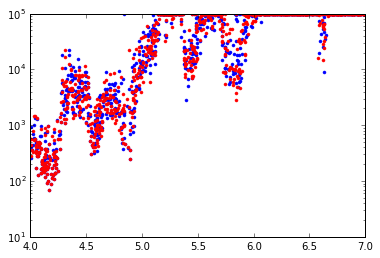

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(beta, tinstability, '.')
ax.plot(beta, offsettimes/df['P1'][0], 'r.')
ax.set_yscale('log')

(0.001, 15)

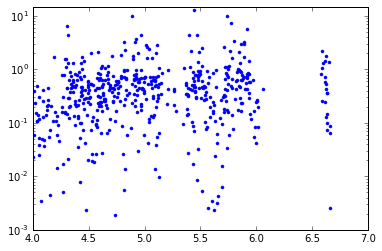

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(beta, np.abs(tinstability-offsettimes/df['P1'][0])/tinstability, '.')
ax.set_yscale('log')
ax.set_ylim([1.e-3,15])

In [47]:
diff = np.abs(tinstability-offsettimes/df['P1'][0])/tinstability
diff[-30:]

array([  0.00000000e+00,   7.55498540e-01,   0.00000000e+00,
         4.13921350e-01,   0.00000000e+00,   7.88115321e-01,
         0.00000000e+00,   1.69243505e+00,   0.00000000e+00,
         1.13021792e+00,   1.64280600e-01,   0.00000000e+00,
         1.18216514e+00,   0.00000000e+00,   0.00000000e+00,
         5.81461833e-01,   1.33641640e+00,   0.00000000e+00,
         0.00000000e+00,   1.30180305e+00,   0.00000000e+00,
         4.70778328e-01,   0.00000000e+00,   3.35430096e-12,
         0.00000000e+00,   1.84206633e-02,   0.00000000e+00,
         4.40671789e+00,   1.99029571e-02,   0.00000000e+00])

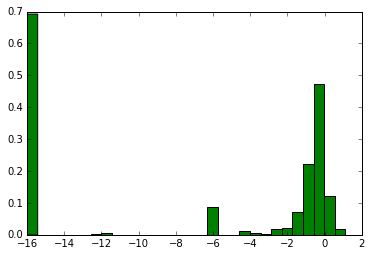

In [50]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(np.log10(diff+1.e-16), 30, normed=1, facecolor='green')

In [24]:
%%px --local
def systemnooutput(sim_id):
    random.seed(sim_id)
    
    beta1 = random.uniform(betamin, betamax)
    a2 = a1 + beta1*gamma*a1
    a3 = a2 + beta1*gamma*a2
    
    sim = rebound.Simulation()
    sim.integrator="whfast"
    sim.G = 4*np.pi**2
    sim.exit_min_distance = a1*gamma # use smaller hill radius as exit condition
    
    
    sim.add(m=1.)
    sim.add(m=mp, a=a1, f=0.)
    sim.add(m=mp, a=a2, f=np.pi)
    sim.add(m=mp, a=a3, f=0.)
    sim.move_to_com()
    ps = sim.particles
    
    sim.init_megno()
    P0 = ps[1].P
    tmax = maxorbs * P0 # number of inner planet orbital periods to integrate
    sim.dt = P0/100.
    
    features = [maxorbs, mp, gamma]
    for p in ps[1:sim.N_real]:
        features = features + [p.a, p.P, p.e, p.pomega, p.inc, p.Omega, p.f, p.x, p.y, p.z, p.vx, p.vy, p.vz]
        
    stable = [True] # assume it's stable and update if not
    
    E0 = sim.calculate_energy()
    t0 = time.time()
    
    try:
        sim.integrate(tmax)
    except rebound.Encounter as error:
        stable = [False]

    filename = '/mnt/raid-cita/dtamayo/Stability/data/longintegrations/offsetfinalstate'+str(sim_id)+'.csv'
    with open(filename, 'w') as f:
        f.write(str(sim.t)) # this block added after the 1e7 dataset was generated for future use
        try:
            outs = [1./sim.calculate_lyapunov()]
        except: 
            outs = [np.inf]
        for p in ps[1:sim.N_real]:
            outs = outs + [p.a, p.P, p.e, p.pomega, p.inc, p.Omega, p.f]
        for out in outs:
            f.write(',{0}'.format(out))
        f.write('\n')
    
    end = '/mnt/raid-cita/dtamayo/Stability/data/longintegrations/endoffset'+str(sim_id)+'.bin'
    sim.save(end)
    features = stable+[sim.t/P0]+features+[np.abs((sim.calculate_energy()-E0)/E0), time.time()-t0]
    return features

In [25]:
Nsystems=1000
res = dv.map(systemnooutput, list(range(Nsystems)))

In [30]:
sim_id = 3
df = pd.read_csv('/mnt/raid-cita/dtamayo/Stability/data/longintegrations/offsetfinalstate'+str(sim_id)+'.csv', names=columns)    

In [33]:
type(df['Time'][0])

numpy.float64

In [34]:
import numpy as np
columns = ['Time', 'Lyapunov Time']
for i in ['1', '2', '3']:
    columns += ['a'+i, 'P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i]

offsettimes = np.zeros(1000)
for i, sim_id in enumerate(range(1000)):
    df = pd.read_csv('/mnt/raid-cita/dtamayo/Stability/data/longintegrations/offsetfinalstate'+str(sim_id)+'.csv', names=columns)
    offsettimes[i] = df['Time'][0]

In [35]:
offsettimes

array([  1.11802560e+03,   9.04410042e+01,   1.11802560e+03,
         9.34597851e+01,   3.90490567e+01,   1.11478892e+02,
         1.11802560e+03,   5.99506571e+01,   2.71548295e+01,
         1.41438512e+02,   1.11802560e+03,   1.11802560e+03,
         1.49142268e+02,   2.11244230e+01,   5.72412339e+01,
         1.11802560e+03,   2.22913845e+02,   1.11802560e+03,
         3.37677273e+00,   1.11802560e+03,   1.11802560e+03,
         3.33727289e+01,   1.11802560e+03,   1.11802560e+03,
         1.11802560e+03,   3.72869700e+02,   1.11802560e+03,
         9.52269029e+02,   4.05939444e+01,   1.11802560e+03,
         8.46274723e+02,   1.65610897e+01,   2.95292922e+00,
         9.86549259e+02,   1.11802560e+03,   1.11802560e+03,
         4.16199118e+02,   1.11802560e+03,   3.50563748e+02,
         1.04123961e+01,   3.60389404e+02,   1.11802560e+03,
         2.10172602e+02,   1.66339849e+00,   1.11802560e+03,
         2.06819084e+01,   1.11515686e+03,   3.80412907e+02,
         1.11802560e+03,

In [106]:
df = pd.read_csv('/mnt/raid-cita/dtamayo/Stability/data/longintegrations/output'+str(sim_id)+'.csv', names=columns)

In [107]:
df.tail()

Time  Lyapunov Time        a1        P1        e1   pomega1  inc1  \
90  100.723027       1.154399  0.049180  0.010906  0.044803  0.177510   0.0   
91  101.842172       1.159185  0.049065  0.010868  0.045786  0.056406   0.0   
92  102.961317       1.163417  0.048830  0.010790  0.052561  0.482633   0.0   
93  104.080462       1.167073  0.048843  0.010795  0.053450  1.170652   0.0   
94  104.659375       1.168710  0.047980  0.010510  0.071339  1.459649   0.0   

    Omega1        f1        a2    ...     inc2  Omega2        f2        a3  \
90     0.0  2.389361  0.055573    ...      0.0     0.0 -2.916349  0.060156   
91     0.0 -2.641276  0.055761    ...      0.0     0.0 -4.126692  0.060099   
92     0.0  2.352726  0.055991    ...      0.0     0.0 -4.060254  0.060190   
93     0.0 -2.311024  0.055886    ...      0.0     0.0 -0.985280  0.060289   
94     0.0 -2.932587  0.057421    ...      0.0     0.0  2.514817  0.060005   

          P3        e3   pomega3  inc3  Omega3        f3  
90  0.014754  0.028522 -2.689853   0.0     0.0  5.192771  
91  0.014733  0.013196 -2.947203   0.0     0.0  4.927828  
92  0.014766  0.028714 -2.157541   0.0     0.0  4.495263  
93  0.014803  0.032508 -2.524920   0.0     0.0  3.583646  
94  0.014698  0.038013 -2.821482   0.0     0.0  4.201389  

[5 rows x 23 columns]

In [28]:
cl.shutdown_cluster('lobster', rc)